소스 출처 : https://tykimos.github.io/2017/01/27/Keras_Talk/

https://tykimos.github.io/lecture/

In [0]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train의 shape :
(60000, 28, 28) 

x_train의 첫 번째 데이터 :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253

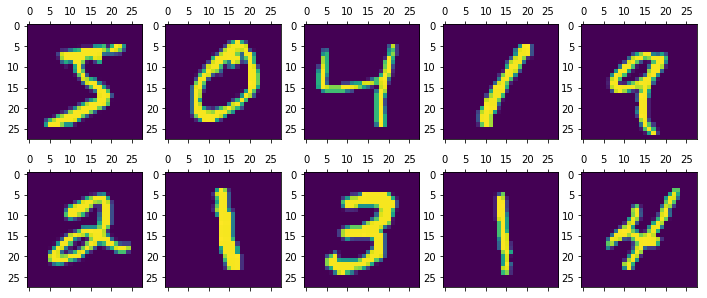

In [0]:
# 1. 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train의 shape :')
print('{} \n'.format(x_train.shape))
print('x_train의 첫 번째 데이터 :')
print('{} \n'.format(x_train[0]))
print('='*60)
print('x_test의 shape :')
print('{} \n'.format(x_test.shape))
print('x_test의 첫 번째 데이터 :')
print('{} \n'.format(x_test[0]))      
print('='*60)

# MNIST 첫번째 부터 10번째 까지 데이터 보기
import matplotlib.pyplot as plt
%matplotlib inline
figure = plt.figure()
figure.set_size_inches(12, 5)
axes = []
for i in range(1, 11):
  axes.append(figure.add_subplot(2, 5, i))
for i in range(10):
  axes[i].matshow(x_train[i])

# 1-1. 데이터셋을 학습용(x_train, y_train)과 평가용(x_test, y_test)으로 나누기
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0    #28곱하기 28은 784
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

print('reshape 후의 x_train의 shape :') 
print('{} \n'.format(x_train.shape))
print('reshape 후의 x_train의 첫 번째 데이터 :')
print('{} \n'.format(x_train[0]))
print('='*60)
print('reshape 후의 x_test의 shape :')
print('{} \n'.format(x_test.shape))
print('reshape 후의 x_test의 첫 번째 데이터 :')
print('{} \n'.format(x_test[0])) 



In [0]:
print('y_train의 shape : {}'.format(y_train.shape))
print('y_train의 첫 번째 데이터 :')
print('{} \n'.format(y_train[0]))
print('='*60)
print('y_test의 shape : {}'.format(y_test.shape))
print('y_test의 첫 번째 데이터 :')
print('{} \n'.format(y_test[0])) 
print('='*60)
      
y_train = np_utils.to_categorical(y_train) #원핫인코딩 해준것.
y_test = np_utils.to_categorical(y_test)

print('to_categorical 후의 y_train의 shape : {}'.format(y_train.shape))
print('to_categorical 후의 y_train의 첫 번째 데이터 :')
print('{} \n'.format(y_train[0]))
print('='*60)
print('to_categorical 후의 x_test의 shape : {}'.format(x_test.shape))
print('to_categorical 후의 x_test의 첫 번째 데이터 :')
print('{}'.format(y_test[0])) 

y_train의 shape : (60000,)
y_train의 첫 번째 데이터 :
5 

y_test의 shape : (10000,)
y_test의 첫 번째 데이터 :
7 

to_categorical 후의 y_train의 shape : (60000, 10)
to_categorical 후의 y_train의 첫 번째 데이터 :
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 

to_categorical 후의 x_test의 shape : (10000, 784)
to_categorical 후의 x_test의 첫 번째 데이터 :
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu')) #units는 가중치(=특징 )개수, 뭔지는 모르겠으나 특징 64개를 만들어줘. 33개로 만들어줘. 등등 // 첫줄에만 inputdim을 넣어주고 다음부터는 안넣어준다.
# model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #레이터2에서는 가중치를 10개로 하겠어.마지막은 softmax . 이게 왜 마지막이냐며는 0~9까지 분류기때문에 마지막 클래스가 총 10개여서/

In [0]:
# 3. 모델 학습과정 설정하기.-> 이 방법을 통해서 가중치 최적화를 할것이다. =(loss를 최소로 하는것)loss의 식이 범주형이기떄문에 categorical 사용가능 ,optimizer  sgd라는 모델을 쓰겠따.)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #matrics는 평가지표라고 보면됨...정확도를 가지고 최적화를 시키겠다..
#loss를 최소화하기위한 과정!이렇게 할꺼다라는 과정을 설정해준것임..아직 실행한것은 아님. 학습은 fit에서 됨.

In [0]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.6720 - acc: 0.8269
Epoch 2/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.3443 - acc: 0.9039
Epoch 3/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.2962 - acc: 0.9169
Epoch 4/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.2666 - acc: 0.9249
Epoch 5/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.2448 - acc: 0.9314


In [0]:
# 5. 학습과정 살펴보기
print('## training loss ##')
print(hist.history['loss'], '\n')
print('## training accuracy ##')
print(hist.history['acc'])
#오차는 내려가고 정확도는 올라감다.

## training loss ##
[0.6719846527655919, 0.344281359521548, 0.29616562617818515, 0.2666338012079398, 0.24479538332422573] 

## training accuracy ##
[0.82695, 0.9039, 0.91685, 0.9248833333333333, 0.93135]


In [0]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and accuracy ##')
print(loss_and_metrics)


10000/10000 [==============================] - 1s 55us/step
## evaluation loss and accuracy ##
[0.22867498847842216, 0.9334]


In [0]:
# 7. 모델 사용하기
xhat = x_test[0:1] # 왜 이렇게 넣는지 하단에서 설명
#한개만 돌려보고싶은게 아니라면 xhat = x_test[x_tets]]  요로케 해주면 됨 
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
#9.9277955e 이게 제일 높은값이다.  7번째값

## yhat ##
[[2.3402083e-04 1.3906413e-07 5.8333226e-04 2.3853909e-03 5.2451505e-06
  1.1700177e-04 1.6789988e-07 9.9277955e-01 1.1604963e-04 3.7791603e-03]]


In [0]:
y_test[0] #7번째가 가장높으니가 잘 예측한것.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
x_test.shape

(10000, 784)

In [0]:
# ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)

x_test[0].shape

(784,)

In [0]:
x_test[0:1].shape  # 0:1 을 해주는 이유는 (1,784)인 형태로 넣어주기 위함.

(1, 784)